For the purpose of illustrating data analysis of a FRAP experiment, I bleached the H2B-mCherry signal in cells and tracked their recovery. Bleached cells in organoids and their direct neighbors were tracked. Fluorescence was measured with a circle of radius 3 micron, and saved under the key "H2B_intensity".

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats

#%matplotlib notebook
import sys
sys.path.insert(0,r'C:\Users\spoelstra\Documents\GitHub\OrganoidTracker')

import warnings
warnings.filterwarnings('ignore')

from organoid_tracker.imaging import io
from organoid_tracker.linking_analysis import linking_markers
from typing import Optional
from organoid_tracker.core.experiment import Experiment
from organoid_tracker.core.position import Position
from organoid_tracker.linking_analysis.lineage_drawing import LineageDrawing
from organoid_tracker.position_analysis import position_markers


In [2]:
#Plotting defaults
plt.rc('font', size=7.5) #controls default text size
colorpalette = 'Set1'
plt.rcParams["font.family"] = "Arial"

In [3]:
path_to_tracking_files = r"\\sun\zon\group-folder\Kasper\Projects\Nature Protocol Live imaging\Figures\Tracking files"
tracking_files = os.listdir(path_to_tracking_files)
overall_MAX_time_point = 100


In [4]:
df = pd.DataFrame(columns=['Plate','Organoid','Bleached','Time','H2B_intensity'])

i=0

for tracking_file in tracking_files:
    experiment = io.load_data_file(os.path.join(path_to_tracking_files,tracking_file))
    experiment.links.sort_tracks_by_x()
    hours_between_time_points = np.round(experiment.images.resolution().time_point_interval_h,2)
    #print(hours_between_time_points)
    Full_time_axis = np.linspace(0,overall_MAX_time_point,overall_MAX_time_point)*hours_between_time_points
    
    for track in experiment.links.find_all_tracks():
        Time = np.full(overall_MAX_time_point,np.nan).flatten()
        H2B_intensity = np.full(overall_MAX_time_point,np.nan).flatten()
        
        for position in track.positions():
            Time[position.time_point_number()] = position.time_point_number()*hours_between_time_points
            if experiment.position_data.get_position_data(position,'H2B_intensity')!=None:
                H2B_intensity[position.time_point_number()] = float(experiment.position_data.get_position_data(position,'H2B_intensity'))

        df.loc[i] = pd.Series({"Plate":str(tracking_file).rsplit("_")[0],
                               "Organoid": str(tracking_file).rsplit("_")[1],  
                               "Bleached": experiment.position_data.get_position_data(track.find_first_position(),'Bleached')==True,
                               "Time":Time,
                               "H2B_intensity":H2B_intensity/H2B_intensity[0]
                              })
        i+=1

df = df.sort_values(by='Bleached', ascending=True)
df

,Plate,Organoid,Bleached,Time,H2B_intensity
0,WKS216,xy002,False,"[0.0, 0.2, 0.4, 0.6000000000000001, 0.8, 1.0, ...","[1.0, 1.071345301935183, 1.1117306518902883, 1..."
18,WKS216,xy010,False,"[0.0, 0.2, 0.4, 0.6000000000000001, 0.8, 1.0, ...","[1.0, 0.8849859161597273, 0.8980756030013965, ..."
16,WKS216,xy010,False,"[0.0, 0.2, 0.4, 0.6000000000000001, 0.8, 1.0, ...","[1.0, 0.910836383728158, 0.8308297073923153, 0..."
15,WKS216,xy010,False,"[0.0, 0.2, 0.4, 0.6000000000000001, 0.8, 1.0, ...","[1.0, 0.9464905711757097, 1.052746953502621, 0..."
14,WKS216,xy010,False,"[0.0, 0.2, 0.4, 0.6000000000000001, 0.8, 1.0, ...","[1.0, 0.8455455376659865, 0.9279922978643528, ..."
13,WKS216,xy008,False,"[0.0, 0.2, 0.4, 0.6000000000000001, 0.8, 1.0, ...","[1.0, 0.8829237271483336, 0.9597289060853225, ..."
12,WKS216,xy008,False,"[0.0, 0.2, 0.4, 0.6000000000000001, 0.8, 1.0, ...","[1.0, 0.8900158659246635, 1.1058972336666464, ..."
11,WKS216,xy008,False,"[0.0, 0.2, 0.4, 0.6000000000000001, 0.8, 1.0, ...","[1.0, 1.0223141824025712, 1.0836373376188564, ..."
19,WKS216,xy010,False,"[0.0, 0.2, 0.4, 0.6000000000000001, 0.8, 1.0, ...","[1.0, 0.5919556379849754, 0.9374941456377976, ..."
20,WKS216,xy010,False,"[0.0, 0.2, 0.4, 0.6000000000000001, 0.8, 1.0, ...","[1.0, 0.6195460351198775, 0.6518822577342707, ..."


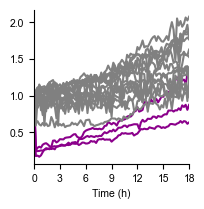

In [5]:
fig, ax = plt.subplots(figsize=(2,2))
for i in range(len(df)):
     plt.plot(df.Time[i],df.H2B_intensity[i],color='darkmagenta' if df.Bleached[i] else 'gray')

ax.set(xlim=[0,18],xticks=np.linspace(0,18,7),xlabel='Time (h)')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

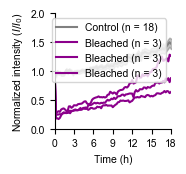

In [6]:
mean_H2B_intensity_Control = np.nanmean(list(df[df.Bleached==False].H2B_intensity),axis=0)
n_Control = np.count_nonzero(~np.isnan(list(df[df.Bleached==False].H2B_intensity)),axis=0)
SEM_H2B_intensity_Control = np.nanstd(list(df[df.Bleached==False].H2B_intensity),axis=0)/np.sqrt(n_Control)

mean_H2B_intensity_Bleached = np.nanmean(list(df[df.Bleached].H2B_intensity),axis=0)
n_Bleached = np.count_nonzero(~np.isnan(list(df[df.Bleached].H2B_intensity)),axis=0)
SEM_H2B_intensity_Bleached = np.nanstd(list(df[df.Bleached].H2B_intensity),axis=0)/np.sqrt(n_Bleached)


fig, ax = plt.subplots(figsize=(1.5,1.5))
plt.fill_between(Full_time_axis,
                 mean_H2B_intensity_Control-SEM_H2B_intensity_Control,
                 mean_H2B_intensity_Control+SEM_H2B_intensity_Control,
                 color='gray',alpha=0.5)
plt.plot(Full_time_axis,mean_H2B_intensity_Control,color='gray',label=f"Control (n = {len(df[df.Bleached==False])})")


for i in range(len(df)):
    if df.Bleached[i]:
        plt.plot(df.Time[i],df.H2B_intensity[i],color='darkmagenta' ,label=f"Bleached (n = {len(df[df.Bleached==True])})")

plt.legend()
ax.set(xlim=[0,18],xticks=np.linspace(0,18,7),xlabel='Time (h)',ylim=[0,2],ylabel='Normalized intensity ($I/I_0)$')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig(r"..\FRAP_curves.pdf")

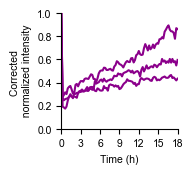

In [7]:
fig, ax = plt.subplots(figsize=(1.5,1.5))
for i in range(len(df)):
    if df.Bleached[i]:
        plt.plot(df.Time[i],df.H2B_intensity[i]/mean_H2B_intensity_Control,color='darkmagenta')
ax.set(xlim=[0,18],xticks=np.linspace(0,18,7),xlabel='Time (h)',ylim=[0,1],ylabel='Corrected \n normalized intensity')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig(r"..\FRAP_curves_corrected.pdf")

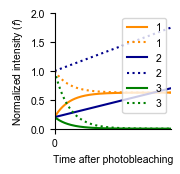

In [31]:
fig, ax = plt.subplots(figsize=(1.5,1.5))

f0 = 0.2
a = 5
b = 3
d = 5

t = np.linspace(0,1,1000)
y_lin = 0.1*a*t+f0
y_lin_ctrl = 0.15*a*t+1

y_eq = a/(b+d)+(f0 - a/(b+d))*np.exp(-(b+d)*t)
y_eq_ctrl = a/(b+d)+(1 - a/(b+d))*np.exp(-(b+d)*t)

y_deg = f0*np.exp(-(b+d)*t)
y_deg_ctrl = np.exp(-(b+d)*t)

plt.plot(t,y_eq,color='darkorange',label='1')
plt.plot(t,y_eq_ctrl,color='darkorange',linestyle=':',label='1')

plt.plot(t,y_lin,color='darkblue',label='2')
plt.plot(t,y_lin_ctrl,color='darkblue',linestyle=':',label='2')

plt.plot(t,y_deg, color='green',label='3')
plt.plot(t,y_deg_ctrl,color='green',linestyle=':',label='3')
plt.legend()
ax.set(xlim=[0,1],xticks=[0],xlabel='Time after photobleaching',
       ylim=[0,2],ylabel='Normalized intensity ($f$)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig(r"..\FRAP_limiting_cases.pdf")